# Exploring the distribution of lengths in some specific WMT22 language dataset

In [1]:
from collections import Counter
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm

In [2]:
### change this ###

SOURCE_LANG = "en"
TARGET_LANG = "es"

###################


# example file: data/wmt22/en_de/10100401_en.txt
DATA_DIR = Path(f"../data/wmt22/{SOURCE_LANG}_{TARGET_LANG}")
SOURCE_DOCS = list(DATA_DIR.glob(f"*_{SOURCE_LANG}.txt"))
TARGET_DOCS = list(DATA_DIR.glob(f"*_{TARGET_LANG}.txt"))

print(f"Found {len(SOURCE_DOCS)} source documents and {len(TARGET_DOCS)} target documents.")

Found 18572 source documents and 18572 target documents.


In [3]:
# read in the documents and compute lengths
source_lengths = []
target_lengths = []
for src_file, tgt_file in tqdm(zip(SOURCE_DOCS, TARGET_DOCS)):
    with open(src_file, 'r', encoding='utf-8') as f:
        src_lines = f.readlines()
        source_lengths.extend([len(line.split()) for line in src_lines])
    with open(tgt_file, 'r', encoding='utf-8') as f:
        tgt_lines = f.readlines()
        target_lengths.extend([len(line.split()) for line in tgt_lines])

print(f"Source lengths: {Counter(source_lengths).most_common(5)}")
print(f"Target lengths: {Counter(target_lengths).most_common(5)}")

18572it [00:44, 420.70it/s]

Source lengths: [(245, 180), (246, 176), (239, 169), (240, 164), (241, 163)]
Target lengths: [(250, 189), (249, 165), (248, 162), (244, 159), (247, 157)]


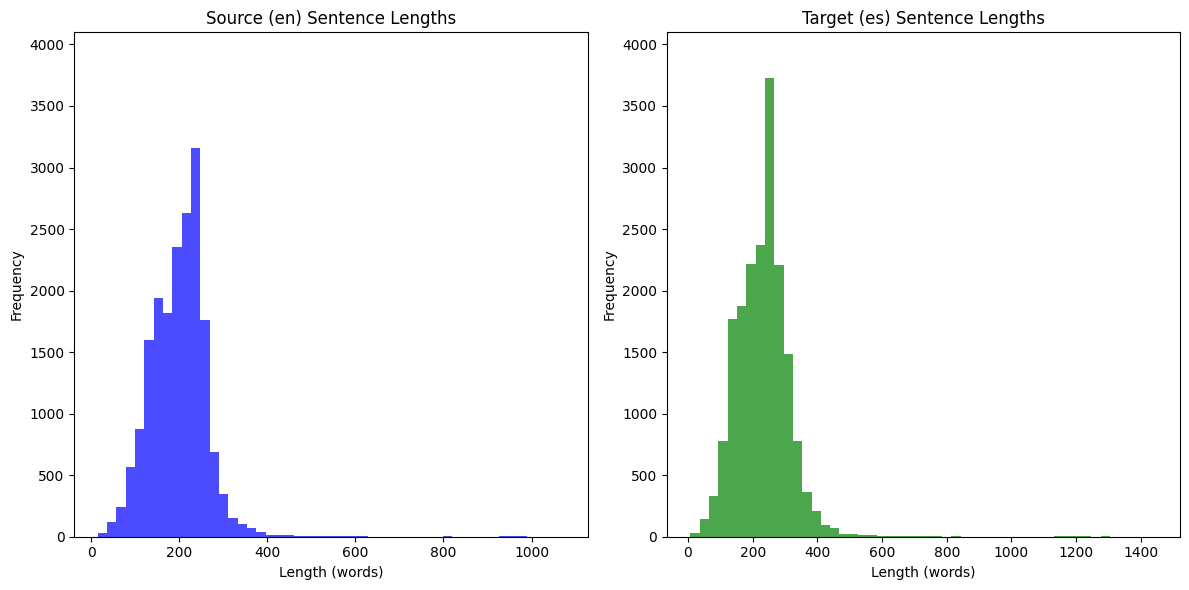

In [4]:
# make plots

plt.figure(figsize=(12, 6))
max_count = max(
    plt.hist(source_lengths, bins=50)[0].max(),
    plt.hist(target_lengths, bins=50)[0].max()
) * 1.1
plt.clf()  # Clear the test plots above

plt.subplot(1, 2, 1)
plt.hist(source_lengths, bins=50, color='blue', alpha=0.7)
plt.title(f'Source ({SOURCE_LANG}) Sentence Lengths')
plt.xlabel('Length (words)')
plt.ylabel('Frequency')
plt.ylim(0, max_count)

plt.subplot(1, 2, 2)
plt.hist(target_lengths, bins=50, color='green', alpha=0.7)
plt.title(f'Target ({TARGET_LANG}) Sentence Lengths')
plt.xlabel('Length (words)')
plt.ylabel('Frequency')
plt.ylim(0, max_count)

plt.tight_layout()
plt.show()